In [1]:
!pip install caer canaro

     |████████████████████████████████| 838 kB 877 kB/s eta 0:00:01
     |████████████████████████████████| 21.5 MB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 56.1 MB 22.1 MB/s eta 0:00:01
     |████████████████████████████████| 454.3 MB 14 kB/s s eta 0:00:01     |███████████▎                    | 160.1 MB 31.2 MB/s eta 0:00:10     |█████████████▎                  | 189.0 MB 27.6 MB/s eta 0:00:10     |██████████████████▋             | 264.4 MB 27.8 MB/s eta 0:00:07     |██████████████████▊             | 266.1 MB 27.8 MB/s eta 0:00:07     |███████████████████▏            | 272.4 MB 27.8 MB/s eta 0:00:07     |███████████████████████▋        | 334.7 MB 25.9 MB/s eta 0:00:05
     |████████████████████████████████| 4.0 MB 36.0 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 33.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 37.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 34.5 MB/s eta 0:00:01
     |███████████████████

In [2]:
!pip install caer

In [3]:
import os
import numpy as np
import caer
import canaro
import gc
import cv2 as cv

In [4]:
IMG_SIZE = (80,80)
channels= 1
char_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset'

- We are going to go through all character folders and sort them acc to no. of images.
- We select the top 10 folders with most images.

In [5]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))
#SORTING
char_dict = caer.sort_dict(char_dict,descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [6]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count+=1
    if(count>=10):
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [7]:
#CREATING TRAIN DATA:
train = caer.preprocess_from_dir(char_path, characters, channels=channels,IMG_SIZE = IMG_SIZE,isShuffle=True,verbose=0)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 23s


/opt/conda/lib/python3.7/site-packages/caer/core.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(obj, dtype=dtype, order=order)


- Goes into the char_path directory and scans for folders in the list 'characters'.
- Picks all the images of that folder and converts to specified img size.
- LABELS :They are put corresponding to the list - 'characters'..eg: 'homer simpson' will be 0.

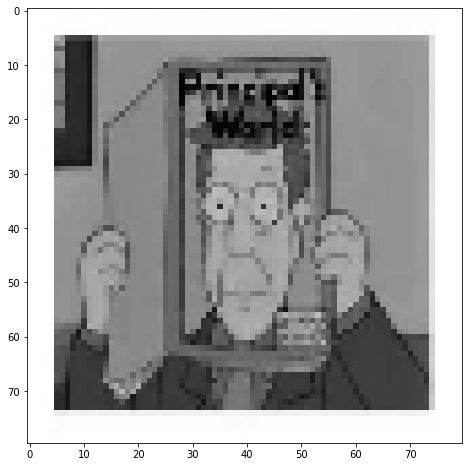

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
plt.imshow(train[0][0],cmap = 'gray')
plt.show()

In [9]:
#SEPARATE TRAIN TO LABELS AND FEATURES:
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [10]:
from tensorflow.keras.utils import to_categorical
#NORMALIZATION:
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))

In [11]:
import sklearn.model_selection as skm 
split_data = skm.train_test_split(featureSet, labels, test_size=.2)
x_train, x_val, y_train, y_val = (np.array(item) for item in split_data)

In [12]:
del train
del featureSet
del labels
gc.collect()

3309

In [13]:
BATCH_SIZE = 32
EPOCHS = 10

In [14]:
# IMAGE DATA GENERATOR:
datagen = canaro.generators.imageDataGenerator()
train_gen =  datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [15]:
# Create our model (returns a compiled model)
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters), 
                                         loss='binary_crossentropy', decay=1e-7, learning_rate=0.001, momentum=0.9,
                                         nesterov=True)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       

In [17]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [ ]:
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/10
133/345 [==========>...................] - ETA: 7:08 - loss: 0.3636 - accuracy: 0.1503